In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, decimate

loading test signal

Filename: data/apnea-ecg-a01er-data.csv
Number of loaded samples:  6000
Total signal duration [s]:  60.0
Signal shape and samples (6000,) : [[-0.06   0.235]
 [-0.065  0.236]
 [-0.06   0.237]
 ...
 [ 0.04  -0.112]
 [ 0.07  -0.113]
 [ 0.09  -0.115]]


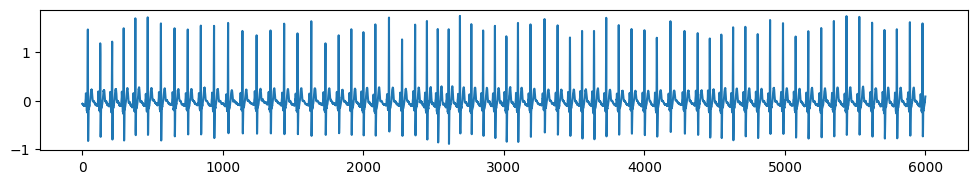

In [2]:
file_name = 'data/apnea-ecg-a01er-data.csv'
fs = 100  # sampling rate [Hz] of recorded signal
# -- LOAD TEST SIGNAL --
y = np.genfromtxt(file_name, usecols=(1,4), delimiter=r',', skip_header=1, )
y_ecg = y[:,0]
y_resp = y[:,1]
K = len(y)
k = np.arange(K)


# plot signal
fig, axs = plt.subplots(1, 1, sharex='all', figsize=(10, 2))
fig.tight_layout()
axs.plot(k, y_ecg)

print("Filename:", file_name)
print("Number of loaded samples: ",K)
print("Total signal duration [s]: ", K/fs)
print("Signal shape and samples "+str(y_ecg.shape)+" : "+str(y))

Find QRS Peaks and compute R-R Intervals

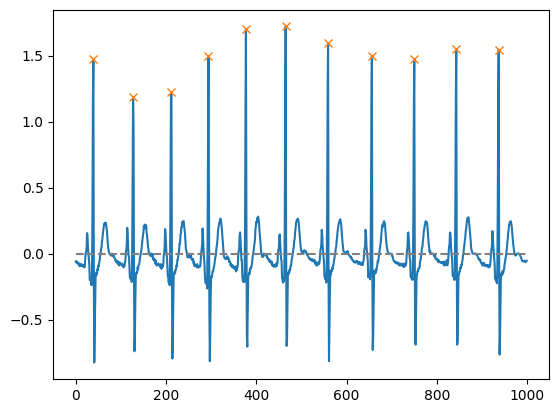

Indices of maxima:  [  39  127  212  294  377  465  559  656  750  843  937 1037 1139 1240
 1339 1436 1531 1629 1730 1824 1914 2000 2085 2182 2275 2368 2452 2529
 2607 2687 2768 2852 2936 3017 3100 3189 3289 3382 3470 3556 3641 3728
 3817 3908 4000 4088 4185 4285 4379 4465 4547 4631 4718 4806 4894 4986
 5076 5166 5258 5348 5438 5529 5620 5708 5796 5889 5979]
Total number of peaks found:  67
R-R Intervals [s]:  [0.088 0.085 0.082 0.083 0.088 0.094 0.097 0.094 0.093 0.094 0.1   0.102
 0.101 0.099 0.097 0.095 0.098 0.101 0.094 0.09  0.086 0.085 0.097 0.093
 0.093 0.084 0.077 0.078 0.08  0.081 0.084 0.084 0.081 0.083 0.089 0.1
 0.093 0.088 0.086 0.085 0.087 0.089 0.091 0.092 0.088 0.097 0.1   0.094
 0.086 0.082 0.084 0.087 0.088 0.088 0.092 0.09  0.09  0.092 0.09  0.09
 0.091 0.091 0.088 0.088 0.093 0.09 ]
QRS  [1.47  1.185 1.22  1.495 1.7   1.72  1.595 1.495 1.47  1.55  1.545 1.605
 1.44  1.35  1.45  1.59  1.39  1.64  1.185 1.35  1.475 1.415 1.575 1.715
 1.265 1.57  1.645 1.48  1.475 1.75

In [45]:
# **to do 1** (dummy code) --
y_ecg_shortened = y_ecg[0:1000]

ind_peaks, _ = find_peaks(y_ecg_shortened, height=0.5) # maximas above zero
nof_peaks = len(ind_peaks) # number of peaks found
# ------------------------------


plt.plot(y_ecg_shortened)
plt.plot(ind_peaks, y_ecg_shortened[ind_peaks], "x")
plt.plot(np.zeros_like(y_ecg_shortened), "--", color="gray")
plt.show()


# New calculation with whole data
ind_peaks, _ = find_peaks(y_ecg, height=0.5) # maximas above zero
nof_peaks = len(ind_peaks) # number of peaks found

print("Indices of maxima: ",ind_peaks)
print("Total number of peaks found: ",nof_peaks)
if nof_peaks == 0:
    print("No maxima found. Exit.")
    exit()
    
# -- **to do 2**  (dummy code) --

rr = np.diff(ind_peaks)


t_rr = np.diff(ind_peaks)/1000  # RR-time intervals
y_QRS = y_ecg[ind_peaks] # QRS amplitudes at R wave
# -------------------------------
print("R-R Intervals [s]: ",t_rr)
print('QRS ', y_QRS)

Plotting of the ECG signal and the R-R intervals

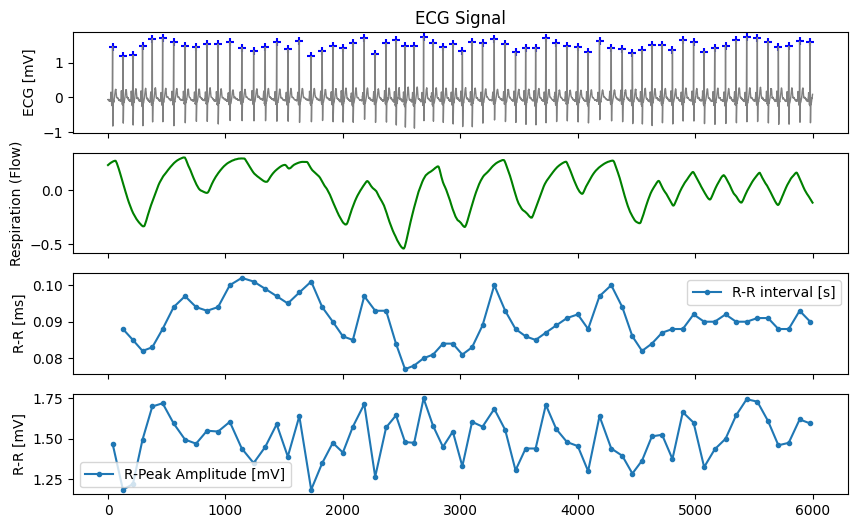

In [46]:
fig, axs = plt.subplots(4, 1, sharex='all', figsize=(10, 6))
axs[0].plot(k, y_ecg, lw=1.0, color='gray')
axs[0].scatter(ind_peaks, y_ecg[ind_peaks], c='b', marker='+')
axs[0].set_title("ECG Signal")
axs[0].set_ylabel('ECG [mV]')

axs[1].plot(k, y_resp, 'g-', label='Respiration')
axs[1].set_ylabel('Respiration (Flow)')

axs[2].plot(ind_peaks[1:], t_rr, '.-', label='R-R interval [s]')
axs[2].set_ylabel('R-R [s]')
axs[2].legend()

axs[3].plot(ind_peaks, y_QRS, '.-', label='R-Peak Amplitude [mV]')
axs[3].set_ylabel('R-R [mV]')
axs[3].legend()

plt.show()

Plotting of the ECG signal vs. Respiration

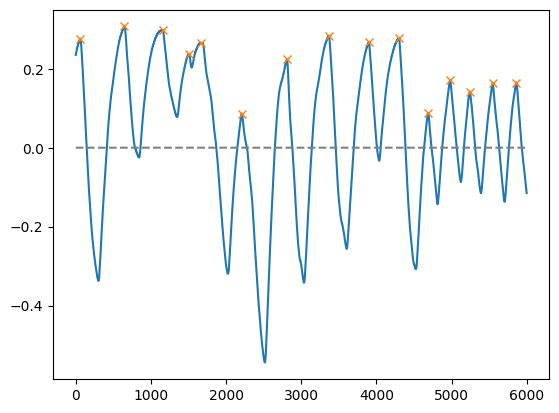

In [50]:
ind_peaks_resp, _ = find_peaks(y_resp)

ind_peaks_resp

plt.plot(y_resp)
plt.plot(ind_peaks_resp, y_resp[ind_peaks_resp], "x")
plt.plot(np.zeros_like(y_resp), "--", color="gray")
plt.show()

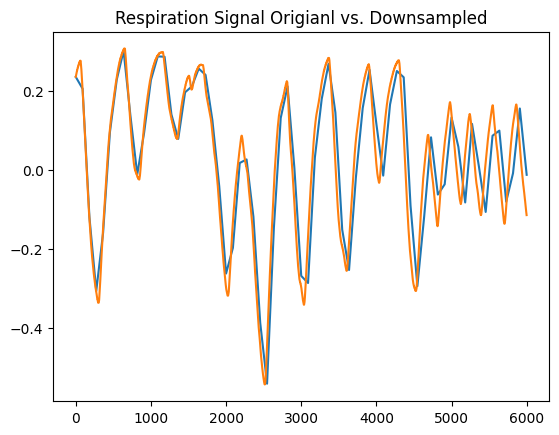

In [100]:
downsample_freq = round(K/len(t_rr))
y_resp_downsampled = y_resp[::downsample_freq-1]

plt.plot(np.linspace(0, 6000, y_resp_downsampled.shape[0]), y_resp_downsampled, label='Downsampled Respiration Signal')
plt.plot(y_resp, label='Original Respiration Signal')
plt.title('Respiration Signal Origianl vs. Downsampled')
plt.show()

Text(0, 0.5, 'Respiration [Flow]')

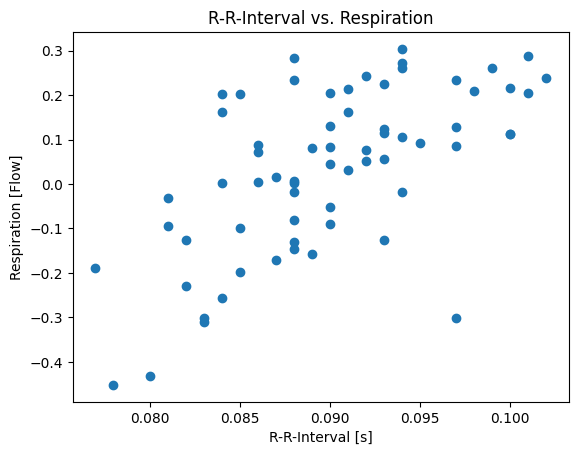

In [101]:
plt.scatter(t_rr, y_resp[::downsample_freq])
plt.title('R-R-Interval vs. Respiration')
plt.xlabel('R-R-Interval [s]')
plt.ylabel('Respiration [Flow]')

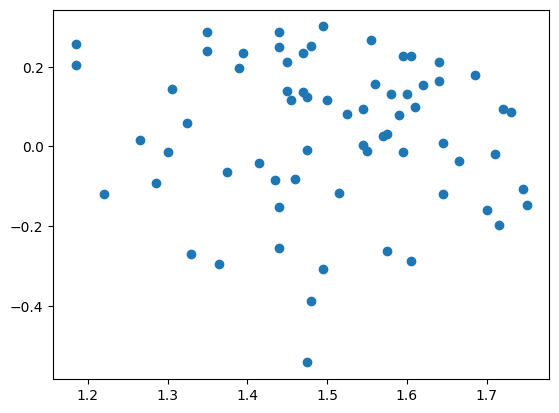

In [83]:
plt.scatter(y_QRS, y_resp[::downsample_freq-1])

### Make linear regression

Score: 0.38209139702153416
Coeficients: [19.07612457]
Intercept: -1.6829269686484212


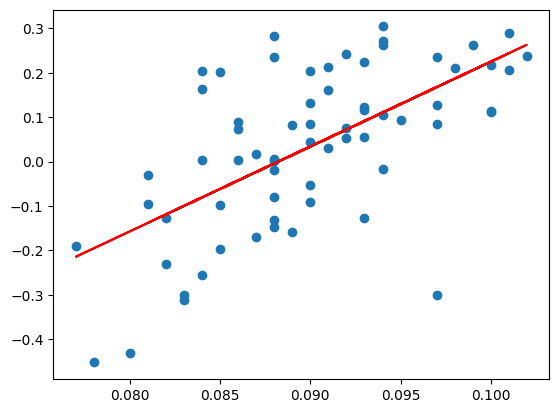

In [105]:
from sklearn.linear_model import LinearRegression


t_rr = t_rr.reshape(-1, 1)  # reshape for sklearn


reg = LinearRegression().fit(t_rr, y_resp[::downsample_freq])
print(f'Score: {reg.score(t_rr, y_resp[::downsample_freq])}')

print(f'Coeficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')

line = reg.coef_ * t_rr + reg.intercept_

plt.scatter(t_rr, y_resp[::downsample_freq])
plt.plot(t_rr, reg.predict(t_rr), color='red')
plt.show()
